# Schokoriegel

Sie arbeiten für einen Schokoladenhersteller und haben einen neuen Schokoriegel entwickelt.
Um zu entscheiden was der ideale Verkaufspreis ist, setzen Sie ein Experiment auf. In sechs Läden bieten
Sie das Produkt zu unterschiedlichen Preisen für eine Dauer von 2 Wochen an. Sie zählen jeweils die Anzahl der 
verkauften Riegel:



| Laden |Preis (Euro)|Verkaufte Riegel|
| ------|------------|----------------|
|   1   |     20     |       2        |
|   2   |     16     |       4        |
|   3   |     15     |       4        |  
|   4   |     14     |       7        | 
|   5   |     13     |       8        |
|   6   |     10     |       10       |

a) Zeichnen sie den passenden Scatterplot der Daten
   + händisch
   + matplotlib

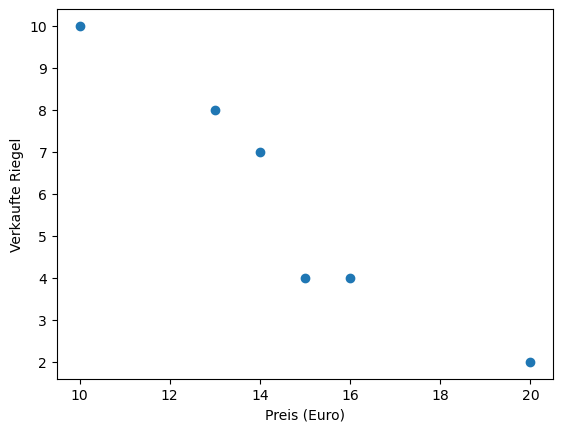

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

X=np.array([[20, 2], [16,4], [15,4], [14,7],[13,8],[10,10]])
plt.xlabel('Preis (Euro)')
plt.ylabel('Verkaufte Riegel')
plt.scatter(X[:,0], X[:,1])

b) Bestimmen Sie die Regressionsgerade und berechnen sie diese Mittel Ordinary Least Square

Regressionsgerade: 18.37951807228916 -0.855421686746988x


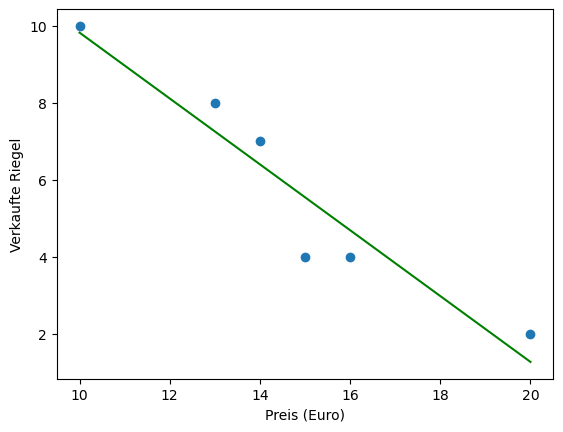

In [3]:
Ys = X[:, 1]
Xs = X[:, 0]

mean_y = np.mean(Ys)
mean_x = np.mean(Xs)

div1 = 0
div2 = 0
for i in range(len(Ys)):
    div1 = div1+((Ys[i]-mean_y)*(Xs[i]-mean_x))
for x in Xs:
    div2 = div2 + (x-mean_x)**2

w1 = div1/div2


w0=mean_y - w1*mean_x
print("Regressionsgerade: " + str(w0) + " " + str(w1) + "x")

def regressionLine(x):
    return w0 + w1*x

line = np.empty([0])
for x in Xs:
    line = np.append(line, regressionLine(x))

X=np.array([[20, 2], [16,4], [15,4], [14,7],[13,8],[10,10]])
plt.xlabel('Preis (Euro)')
plt.ylabel('Verkaufte Riegel')
plt.scatter(X[:,0], X[:,1])

plt.plot(Xs, line, color='green')

# Implementierung der Linearen Regression

Schreiben Sie eine Klasse MyLinReg, die eine Lineare Regression mit einem abhängigen Parameter erlauben soll.
Eine Funktion fit() soll die Regressionsparamter mittels Gradientenabstieg bestimmen


Testen Sie ihr System mit einem Merkmal des Diabetes-Datensets. Train=Test sind für diese Aufgabe ok.




In [4]:
class MyLinReg:
    
    def __init__(self, epochs):
        self.w0 = random.random()
        self.w1 = random.random()
        self.e = epochs
    
    def fit(self, X, Y):
        lr = 1/(Y[0]-self.predict(X[0]))
        for i in range(self.e):
            yPred = np.empty([0])
            for x in X:
                yPred= np.append(yPred, self.predict(x))
            diffY = Y - yPred
            deltaW1 = (-1/len(X))*np.sum(X*diffY)
            deltaW0 = (-1/len(X))*np.sum(diffY)
            self.w1 = self.w1-lr*deltaW1
            self.w0 = self.w0 - lr*deltaW0
            
    def predict(self, x):
        return self.w0 + self.w1*x
        

test = MyLinReg(3)

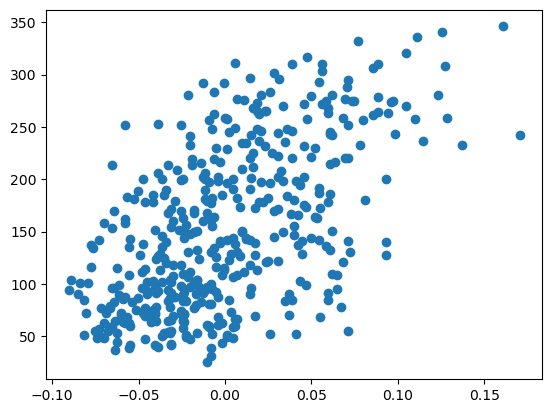

In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X = diabetes.data[:, np.newaxis, 2]
Y = diabetes.target

plt.scatter(X,Y)
test.fit(X, Y)
yPred = np.empty([0])
for x in X:
    yPred = np.append(yPred, test.predict(x))


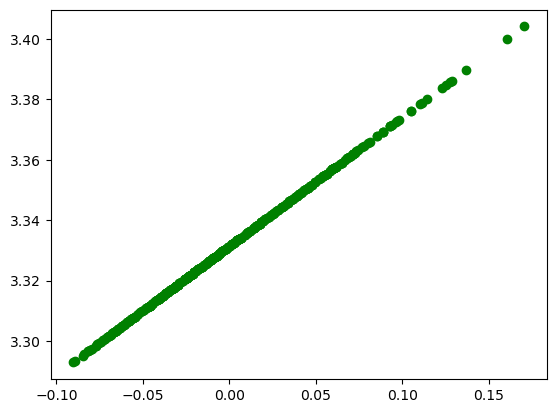

In [6]:
plt.scatter(X, yPred, color='green')

# Regressionsbeispiel

Verwenden Sie den California housing Corpus oder den Boston Corpus aus sklearn und führen sie mittels 
Methoden aus sklearn eine lineare regression durch.

Verwenden Sie dabei das Konzept der LOO-Evaluation für Regression, das in der Vorlesung besprochen wurde.


In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from scipy.stats import pearsonr

chCorpus =fetch_california_housing()

loo = LeaveOneOut()
lr = LinearRegression()

X = chCorpus['data']
y = chCorpus['target']
scores=[]
for train_indices, test_indices in loo.split(X,y):
    #print("Train: ", train_indices, "Test: ", test_indices)
    lr.fit(X[train_indices], y[train_indices])
    pred=lr.predict(X[test_indices])
    scores.append(pred)
print("Done")
r=pearsonr(y,np.asarray(scores).flatten())[0]
print('Pearson r = %.2f' %r)



Done
Pearson r = 0.78


# Eigenständige Implementierung der multiplen linearen Regression.

Schreiben Sie eine Klasse *MyLinRegMult* die die multiple lineare Regression implementiert.
Das Taining der Regression ist mittels Gradientenabstiegsverfahren zu implementieren.


In [49]:
class MyLinRegMult:
    
    def __init__(self, epochs):
        self.w0 = random.random()
        self.w1 = np.empty([0])
        self.e = epochs
    
    def fit(self, X, Y):
        for i in range(X.shape[1]):
            self.w1 = np.append(self.w1, random.random())
        lr = 1/(Y[0]-self.predict(X[0]))    
        for i in range(self.e):
            yPred=np.empty([0])
            for x in X:
                yPred = np.append(yPred, self.predict(x))
            diffY = Y-yPred
            deltaW1 = (-1/len(X))*np.sum(np.dot(diffY, X))
            deltaW0 = (-1/len(X))*np.sum(diffY)
            self.w1 = self.w1 - lr*deltaW1
            self.w0 = self.w0 - lr*deltaW0
    def predict(self, X):
        return self.w0 + np.dot(self.w1, X)

test = MyLinRegMult(30)

In [50]:
X = diabetes.data
Y = diabetes.target
print(X[0])
print(Y[0])
test.fit(X, Y)
yPred = np.empty([0])
for x in X:
    yPred = np.append(yPred, test.predict(x))
print(Y-yPred)

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0
[122.48393481  47.24149683 112.52495477 177.87808619 106.79977413
  69.80675085 110.24405869  33.64882719  81.46906262 281.86950704
  73.98898525  40.77044189 150.91455841 156.4358511   89.76308892
 141.77790615 137.17372817 114.85416945  69.18556795 140.06487912
  40.33275252  21.19187568  40.1348983  215.51716624 156.1520619
 173.88457583 109.87182545  56.95067922 103.20168818 254.27804743
 100.95200251  31.55010014 312.16997638  59.00012244  37.56926189
  73.17594352 236.39940582 247.98039984 222.30203032  61.61595738
  70.84385933  27.94163881  33.0734177   63.70829004 230.2041324
  24.60508629 162.4476681  114.93900045  46.56290586 113.52684983
 126.89828417 196.52483946  30.64680279  75.40559398 153.68964497
 100.12683597  23.93056418   9.85374961 141.60657993 140.85067496
  33.59908686 115.78800901  23.98865854 100.10946263  42.91608417
 134.24652783 1